# **1. Data Exploration and Understanding**

## **1.1 Loading Necessary Libraries and the Dataset**

**This code imports the necessary libraries and loads the dataset. The head() function provides a glimpse of the first few rows**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/used-car-price-prediction-pakistan/used_cars_Pakistan.csv')

# Display the first few rows of the dataset
data.head()

Unnamed: 0    make  model    city  year  mileage  Engine_displacement  \
0           0  Suzuki   Alto  Lahore  2019    45744                660.0   
1           1  Suzuki  Wagon  Lahore  2019    17583                660.0   
2           2  Suzuki  Wagon  Lahore  2019    64085                660.0   
3           3  Suzuki  Wagon  Lahore  2019    71281                660.0   
4           4  Toyota   Aqua  Lahore  2020    19950               1500.0   

   Battery  Price_Rs  
0      NaN   3550000  
1      NaN   3850000  
2      NaN   3890000  
3      NaN   3990000  
4      NaN   3990000

## **1.2 Descriptive Statistics**

**This code provides descriptive statistics for each feature. For numerical columns, it gives count, mean, standard deviation, min, 25th percentile, median, 75th percentile, and max. For categorical columns, it provides count, unique values, top value, and frequency.**

In [2]:
# Get a summary of each feature
data.describe(include='all')

Unnamed: 0    make    model    city          year         mileage  \
count   86120.000000   86120    86120   86120  86120.000000    86120.000000   
unique           NaN      71      436     321           NaN             NaN   
top              NaN  Toyota  Corolla  Lahore           NaN             NaN   
freq             NaN   28109    13912   19354           NaN             NaN   
mean    43059.500000     NaN      NaN     NaN   2012.669995    88789.209963   
std     24860.846928     NaN      NaN     NaN      8.862183    87932.720095   
min         0.000000     NaN      NaN     NaN   1944.000000        1.000000   
25%     21529.750000     NaN      NaN     NaN   2007.000000    31000.000000   
50%     43059.500000     NaN      NaN     NaN   2015.000000    78000.000000   
75%     64589.250000     NaN      NaN     NaN   2020.000000   121000.000000   
max     86119.000000     NaN      NaN     NaN   2023.000000  1000000.000000   

        Engine_displacement      Battery      Price_Rs  
count          85931.000000   189.000000  8.612000e+04  
unique                  NaN          NaN           NaN  
top                     NaN          NaN           NaN  
freq                    NaN          NaN           NaN  
mean            1388.138146   119.653439  4.173561e+06  
std              766.087270   207.891986  9.717305e+06  
min                0.000000     3.000000 -2.147484e+09  
25%             1000.000000    60.000000  1.500000e+06  
50%             1300.000000    80.000000  2.800000e+06  
75%             1600.000000   101.000000  4.750000e+06  
max            15000.000000  2000.000000  3.015000e+08

## **1.3 Visualization of Data Distributions**

**This code uses Plotly Express to create interactive histograms for each numerical feature. The marginal='box' argument adds a box plot on the top, which can provide additional insights about the distribution, such as quartiles and outliers.**

In [3]:
import plotly.express as px

# Histogram for numerical features using Plotly
numerical_features = ['year', 'mileage', 'Engine_displacement', 'Battery', 'Price_Rs']

for feature in numerical_features:
    fig = px.histogram(data, x=feature, nbins=30, marginal='box', title=f'Distribution of {feature}')
    fig.show()

**This code visualizes the top 10 categories for each categorical feature using bar plots. It helps in understanding the most frequent categories.**

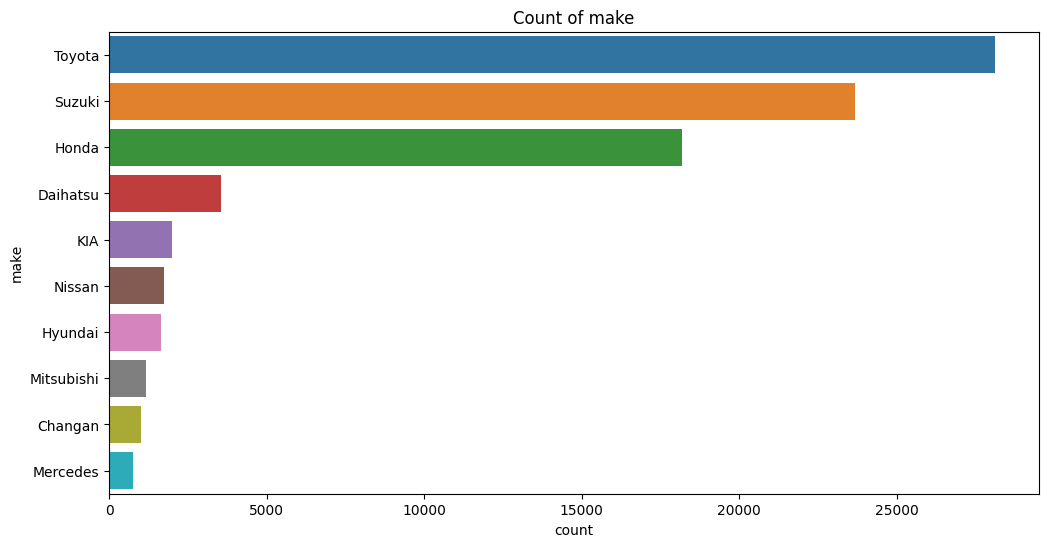

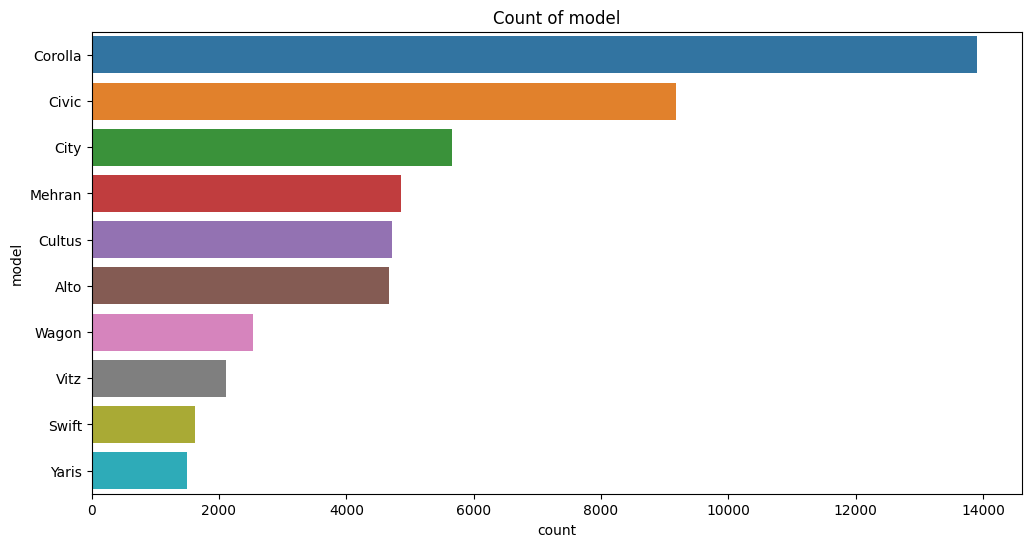

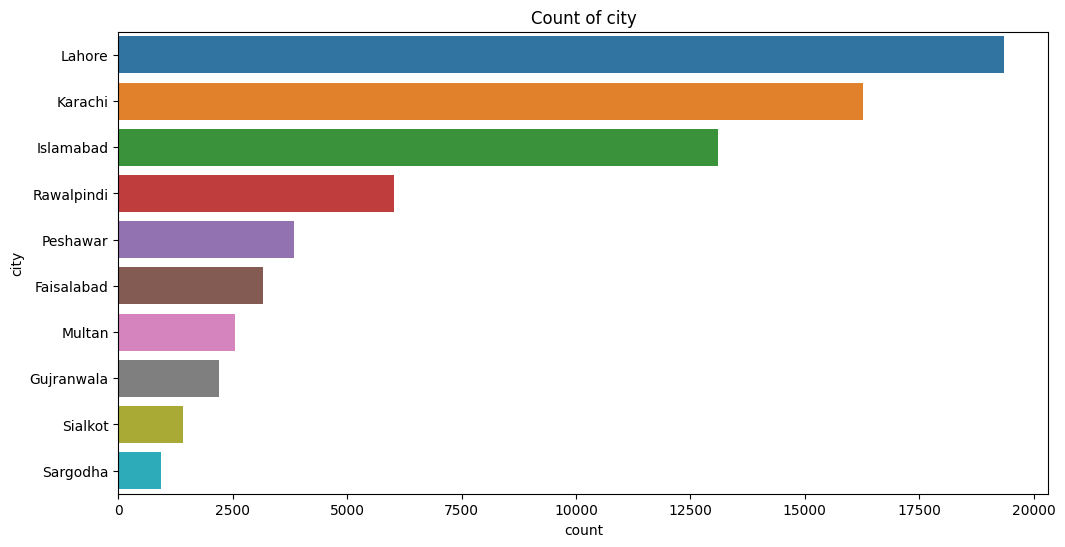

In [4]:
# Bar plots for categorical features
categorical_features = ['make', 'model', 'city']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=data[feature], order=data[feature].value_counts().index[:10])
    plt.title(f'Count of {feature}')
    plt.show()

## **1.4 Identification of Potential Correlations**

**This code visualizes the correlation between numerical features using a heatmap. It helps in understanding the relationships between different features, especially with the target variable Price_Rs.**

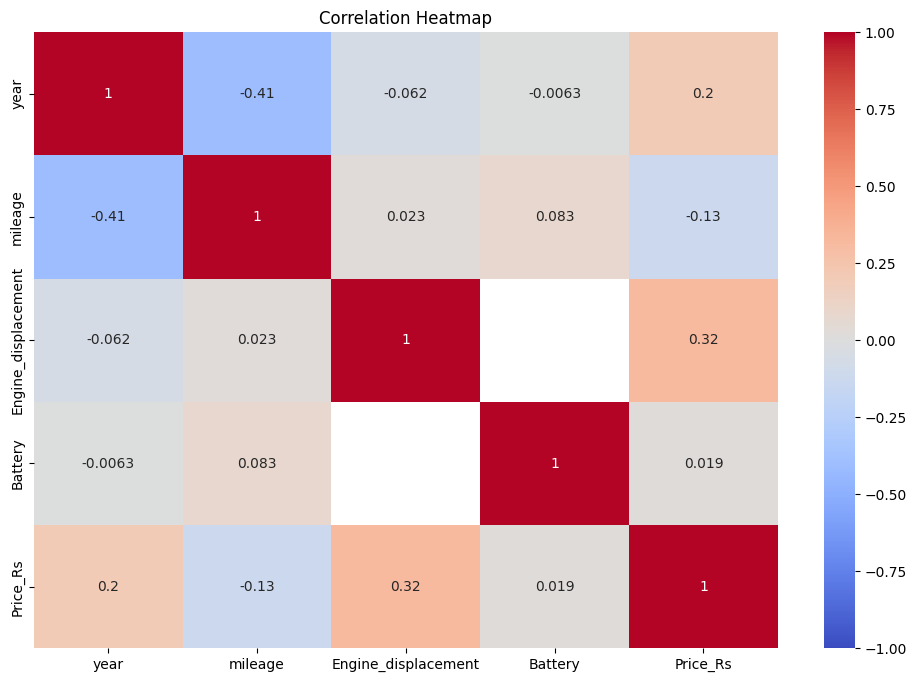

In [5]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# **2. Data Preprocessing**

## **2.1 Handling Missing Values**

**This code checks for missing values in each column and prints them.**

In [6]:
# Checking for missing values
missing_data = data.isnull().sum()
print(missing_data)

Unnamed: 0                 0
make                       0
model                      0
city                       0
year                       0
mileage                    0
Engine_displacement      189
Battery                85931
Price_Rs                   0
dtype: int64


**This code fills missing values. Numerical columns are filled with their median, and categorical columns are filled with their mode.**

In [7]:
# For simplicity, we'll fill numerical columns with their median and categorical columns with their mode
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical data
        mode_val = data[column].mode()[0]
        data[column].fillna(mode_val, inplace=True)
    else:  # Numerical data
        median_val = data[column].median()
        data[column].fillna(median_val, inplace=True)

## **2.2 Detecting and Treating Outliers**

**This code detects outliers using the IQR method and then caps them to the lower and upper bounds.**

In [8]:
# Using IQR method to detect and treat outliers for numerical features

Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Treating outliers
for feature in numerical_features:
    data[feature] = np.where(data[feature] < lower_bound[feature], lower_bound[feature], data[feature])
    data[feature] = np.where(data[feature] > upper_bound[feature], upper_bound[feature], data[feature])

## **2.3 Feature Engineering**

**This code derives a new feature 'car_age' which represents the age of the car.**

In [9]:
# Deriving the age of the car
current_year = 2023  # Assuming the current year is 2023
data['car_age'] = current_year - data['year']

## **2.4 Encoding Categorical Variables**

**This code encodes categorical features using one-hot encoding. The drop_first=True argument ensures that one category is dropped to avoid multicollinearity.**

In [10]:
# Encoding categorical variables (using one-hot encoding for simplicity)

data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)